# REINFORCE Algorithm

[Simple Reinforcement Learning with Tensorflow: Part 2 - Policy-based Agents](https://medium.com/@awjuliani/super-simple-reinforcement-learning-tutorial-part-2-ded33892c724#.zh7rnjs25)

https://medium.com/@awjuliani/maximum-entropy-policies-in-reinforcement-learning-everyday-life-f5a1cc18d32d

In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Instalación de librería gym

https://gym.openai.com/

pip install gym

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import gym

# Cart Pole problem

![alt text](cart_pole.gif "Title")

In [3]:
env = gym.make("CartPole-v0")

In [4]:
#     Description:
#         A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
#         The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.
#     Source:
#         This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
#     Observation: 
#         Type: Box(4)
#         Num	Observation                 Min         Max
#         0	Cart Position             -4.8            4.8
#         1	Cart Velocity             -Inf            Inf
#         2	Pole Angle                 -24 deg        24 deg
#         3	Pole Velocity At Tip      -Inf            Inf
        
#     Actions:
#         Type: Discrete(2)
#         Num	Action
#         0	Push cart to the left
#         1	Push cart to the right
        
#         Note: The amount the velocity that is reduced or increased is not fixed; it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
#     Reward:
#         Reward is 1 for every step taken, including the termination step
#     Starting State:
#         All observations are assigned a uniform random value in [-0.05..0.05]
#     Episode Termination:
#         Pole Angle is more than 12 degrees
#         Cart Position is more than 2.4 (center of the cart reaches the edge of the display)
#         Episode length is greater than 200
#         Solved Requirements
#         Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.

### env.reset devuelve el estado:

In [5]:
(position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole) = env.reset()
# (position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole), reward, done, _ = env.step(env.action_space.sample())
print('position_of_cart:', position_of_cart)
print('velocity_of_cart:', velocity_of_cart)
print('angle_of_pole:', angle_of_pole)
print('rotation_rate_of_pole:', rotation_rate_of_pole)

position_of_cart: 0.04859126129006483
velocity_of_cart: 0.01032478016478857
angle_of_pole: -0.013162214333106069
rotation_rate_of_pole: -0.04371681557780695


### env.step devuelve el estado, el reward como consecuencia de la acción, y si terminó o no el episodio

In [6]:
# env.action_space.sample() muestrea el espacio de acción
(position_of_cart, velocity_of_cart, angle_of_pole, rotation_rate_of_pole), reward, done, _ = env.step(env.action_space.sample())
print('position_of_cart:', position_of_cart)
print('velocity_of_cart:', velocity_of_cart)
print('angle_of_pole:', angle_of_pole)
print('rotation_rate_of_pole:', rotation_rate_of_pole)
print('reward:', reward)
print('done:', done)

position_of_cart: 0.0487977568933606
velocity_of_cart: 0.20563297479958753
angle_of_pole: -0.014036550644662207
rotation_rate_of_pole: -0.34052331021490967
reward: 1.0
done: False


### Espacio de observación y de acción

In [7]:
print(type(env.action_space), env.action_space.n)
print(type(env.observation_space), env.observation_space.shape)

<class 'gym.spaces.discrete.Discrete'> 2
<class 'gym.spaces.box.Box'> (4,)


In [8]:
# Muestrea el espacio de observación
env.observation_space.sample()

array([ 3.3779795e+00, -3.0348809e+38,  3.6761764e-01,  3.2862134e+38],
      dtype=float32)

In [9]:
from reinforce_alg_helper import get_random_episode, plot_episode, get_observations_stats

Using TensorFlow backend.


In [10]:
states, actions, rewards, reward_sum, discounted_rewards = get_random_episode(env)

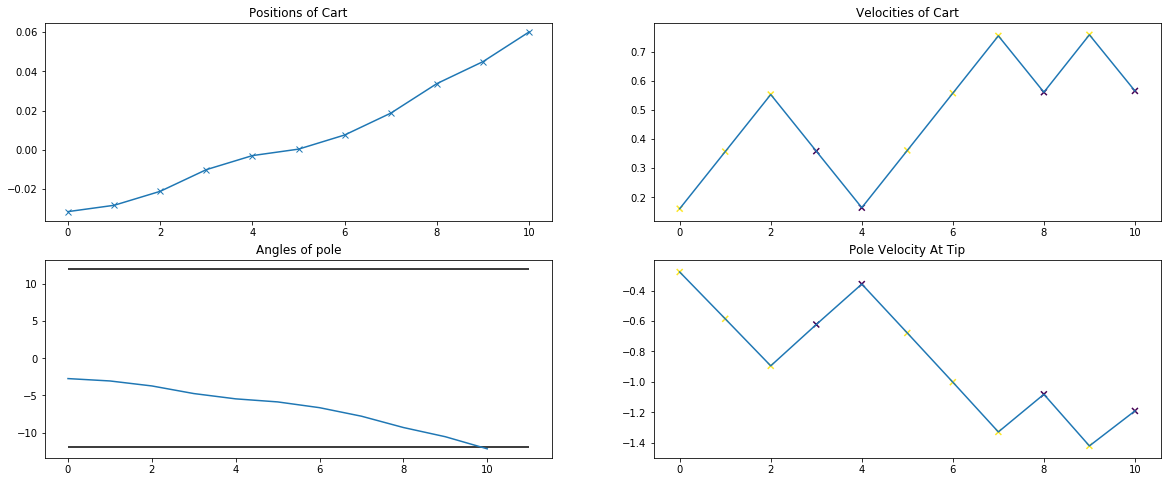

In [11]:
plot_episode(*states.T, actions)

Media de las acciones [0,1]: 0.4981748715235114
Media de rewards: 22.2998


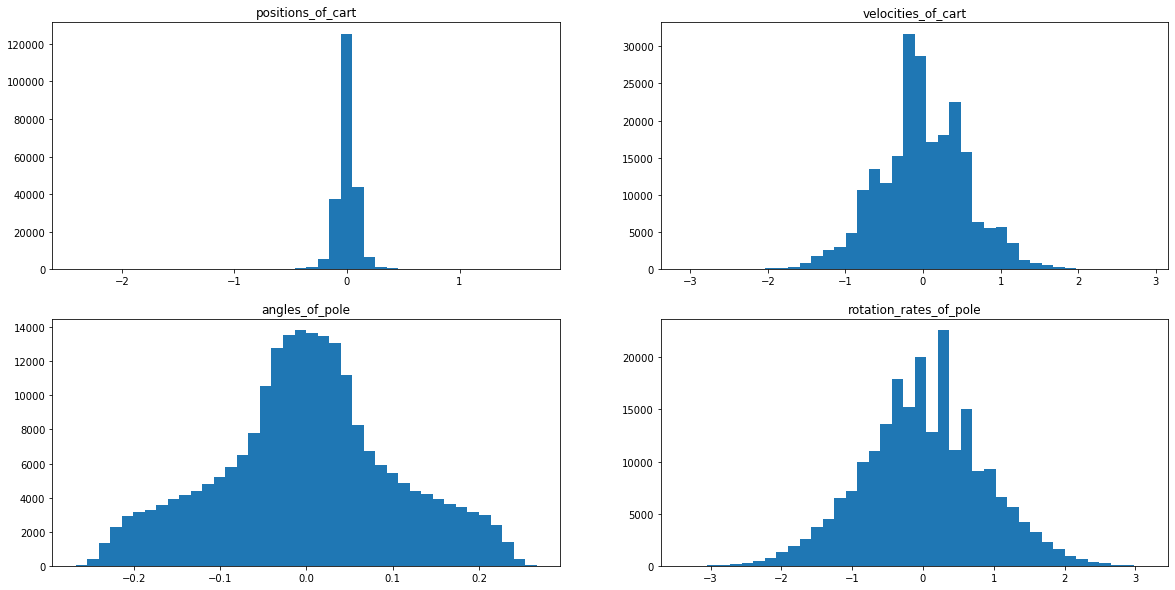

CPU times: user 5.11 s, sys: 4.2 ms, total: 5.11 s
Wall time: 5.11 s


In [100]:
%time states_means, states_stds = get_observations_stats(env, get_random_episode, N=10000)

In [19]:
states_means, states_stds

(array([-0.00094924, -0.00648474,  0.0001356 ,  0.00536881]),
 array([0.10304623, 0.56752807, 0.10304432, 0.85304652]))

In [20]:
# Try running environment with random actions
env.reset()
reward_sum = 0
num_games = 200
num_game = 0
reward_sums = []
print("Rewards sum per episode: ", end='')
while num_game < num_games:
#     env.render()
    observation, reward, done, _ = env.step(env.action_space.sample())
    reward_sum += reward
    if done:
        print(reward_sum, end=' ')
        reward_sums.append(reward_sum)
        reward_sum = 0
        num_game += 1
        env.reset()
print()
print('Average reward sum:', np.array(reward_sums).mean())

Rewards sum per episode: 10.0 22.0 21.0 12.0 33.0 21.0 25.0 31.0 33.0 15.0 30.0 25.0 15.0 28.0 12.0 53.0 13.0 19.0 31.0 14.0 44.0 16.0 16.0 15.0 11.0 11.0 20.0 16.0 20.0 22.0 17.0 39.0 12.0 16.0 9.0 15.0 20.0 14.0 12.0 17.0 14.0 25.0 15.0 21.0 20.0 22.0 19.0 17.0 20.0 14.0 21.0 11.0 15.0 11.0 49.0 46.0 17.0 16.0 22.0 12.0 30.0 16.0 9.0 17.0 14.0 26.0 21.0 19.0 14.0 15.0 16.0 36.0 20.0 30.0 35.0 27.0 10.0 31.0 84.0 22.0 12.0 23.0 14.0 19.0 14.0 13.0 14.0 22.0 20.0 15.0 24.0 12.0 13.0 32.0 17.0 9.0 24.0 41.0 17.0 11.0 18.0 46.0 19.0 30.0 20.0 22.0 36.0 21.0 16.0 14.0 12.0 31.0 28.0 15.0 16.0 23.0 16.0 21.0 24.0 27.0 11.0 21.0 14.0 37.0 17.0 18.0 15.0 11.0 21.0 31.0 14.0 16.0 24.0 19.0 31.0 11.0 13.0 14.0 13.0 9.0 27.0 22.0 32.0 25.0 9.0 12.0 17.0 42.0 18.0 11.0 14.0 48.0 34.0 23.0 16.0 14.0 59.0 14.0 30.0 14.0 18.0 43.0 16.0 17.0 16.0 25.0 28.0 11.0 25.0 16.0 29.0 9.0 22.0 27.0 30.0 25.0 32.0 19.0 41.0 30.0 11.0 11.0 30.0 17.0 22.0 18.0 23.0 13.0 21.0 12.0 9.0 17.0 15.0 41.0 40.0 20.0 38

## Setting up a Neural Network agent
We will use a policy neural network that takes observations, passes them through a single hidden layer and then produces a probability of choosing a left/right movement.

In [21]:
from reinforce_alg_helper import get_policy_model, discount_rewards, score_model, run_episode

In [22]:
hidden_layer_neurons = 8
lr = 1e-2
model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model_predict.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_train.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 32        
_________________________________________________________________
out (Dense)                  (None, 2)                 16        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_predict.input, model_train.input

(<tf.Tensor 'input_x:0' shape=(?, 4) dtype=float32>,
 [<tf.Tensor 'input_x:0' shape=(?, 4) dtype=float32>,
  <tf.Tensor 'advantages:0' shape=(?, 1) dtype=float32>])

Media de las acciones [0,1]: 0.9527769811681484
Media de rewards: 10.461


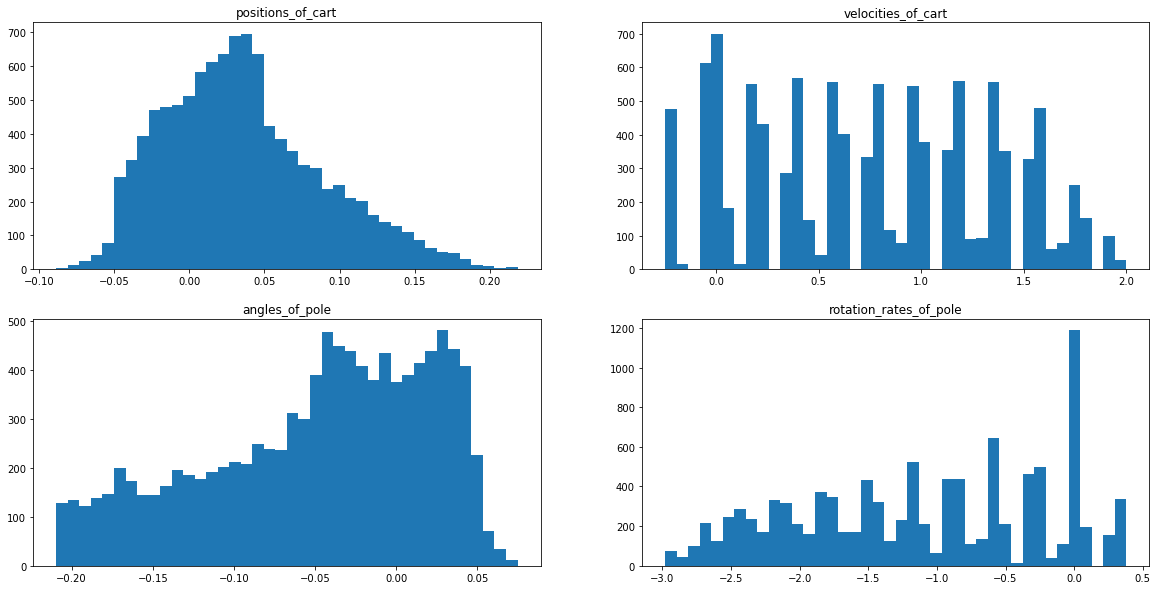

CPU times: user 5.27 s, sys: 513 ms, total: 5.78 s
Wall time: 3.92 s


In [26]:
%time states_means, states_stds = get_observations_stats(env, lambda env: run_episode(env, model_predict, greedy=True), N=1000)

# Ejemplo primer episodio

In [74]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode(env, model_predict, gamma=0.99)

In [75]:
states.shape, actions.shape, rewards.shape, reward_sum

((10, 4), (10, 1), (10, 1), 10.0)

In [76]:
discounted_rewards = np.empty(0).reshape(0,1)
total_actions = np.empty(0).reshape(0,1)

In [77]:
discounted_rewards_episode.reshape(-1)

array([9.5617925 , 8.64827525, 7.72553056, 6.79346521, 5.85198506,
       4.90099501, 3.940399  , 2.9701    , 1.99      , 1.        ])

In [78]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
discounted_rewards.shape

(10, 1)

In [79]:
total_actions = np.vstack([total_actions, actions])
total_actions.shape

(10, 1)

# Segundo episodio

In [80]:
states, actions, rewards, reward_sum, discounted_rewards_episode = run_episode(env, model_predict)

In [81]:
states.shape, actions.shape, rewards.shape, reward_sum

((20, 4), (20, 1), (20, 1), 20.0)

In [82]:
discounted_rewards_episode.reshape(-1)

array([18.20930624, 17.38313762, 16.54862385, 15.70568066, 14.85422289,
       13.99416454, 13.12541872, 12.2478977 , 11.36151283, 10.46617457,
        9.5617925 ,  8.64827525,  7.72553056,  6.79346521,  5.85198506,
        4.90099501,  3.940399  ,  2.9701    ,  1.99      ,  1.        ])

# Mergeamos ambos episodios

In [83]:
discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
discounted_rewards.shape

(30, 1)

In [84]:
total_actions = np.vstack([total_actions, actions])
total_actions.shape

(30, 1)

In [85]:
from reinforce_alg_helper import apply_baselines
discounted_rewards_normalized = apply_baselines(discounted_rewards)

In [86]:
discounted_rewards_normalized.reshape(-1)

array([ 0.24023453,  0.0583255 , -0.12542099, -0.3110235 , -0.49850079,
       -0.68787179, -0.87915563, -1.07237163, -1.2675393 , -1.46467837,
        1.96221713,  1.79770186,  1.63152483,  1.46366924,  1.29411814,
        1.1228544 ,  0.94986073,  0.77511965,  0.5986135 ,  0.42032446,
        0.24023453,  0.0583255 , -0.12542099, -0.3110235 , -0.49850079,
       -0.68787179, -0.87915563, -1.07237163, -1.2675393 , -1.46467837])

## Pasamos acciones a one hot enconding

In [87]:
from reinforce_alg_helper import actions_to_one_hot

In [91]:
actions_train = actions_to_one_hot(total_actions)

In [92]:
print(actions_train)
actions_train.shape

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


(30, 2)

# Genero un batch de datos para despues entrenar la red

In [165]:
batch_states, batch_actions, discounted_rewards, batch_probs = get_batch_data(model_predict, 50)
np.mean(-np.sum(np.log(batch_probs)*batch_probs, axis=1)/np.log(2))

0.9932731923540226

In [157]:
def get_batch_data(model, batch_size=50):
    batch_states = np.empty(0).reshape(0,model.input_shape[1])
    batch_actions = np.empty(0).reshape(0,1)
    discounted_rewards = np.empty(0).reshape(0,1)
    batch_probs = np.empty(0).reshape(0,2)
    for i in range(batch_size):
        states, actions, _, _, discounted_rewards_episode, probs= run_episode(env, model, get_probs=True)
        discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
        batch_states = np.vstack([batch_states, states]) 
        batch_actions = np.vstack([batch_actions, actions]) 
        batch_probs = np.vstack([batch_probs, np.array(probs)])
    return batch_states, batch_actions, discounted_rewards, batch_probs

In [158]:
batch_states, batch_actions, discounted_rewards, batch_probs = get_batch_data(model_predict, 50)

In [160]:
batch_states.shape, batch_actions.shape, discounted_rewards.shape, batch_probs.shape

((1430, 4), (1430, 1), (1430, 1), (1430, 2))

In [96]:
discounted_rewards = apply_baselines(discounted_rewards)

In [97]:
actions_train = actions_to_one_hot(batch_actions)

In [98]:
discounted_rewards.shape, batch_actions.shape, actions_train.shape, batch_states.shape

((1159,), (1159, 1), (1159, 2), (1159, 4))

In [99]:
model_train.evaluate([batch_states, discounted_rewards], actions_train, verbose=1)

1159/1159 [==============================] - 0s 18us/step


0.043132037670063086

In [99]:
training_episodes = 5
for i in range(training_episodes):
    loss = model_train.train_on_batch([batch_states, discounted_rewards], actions_train)
    print(loss)

Instructions for updating:
Use tf.cast instead.
0.045754075
0.036476396
0.027765606
0.019640561
0.012134536


# Train full model

In [101]:
%time states_means, states_stds = get_observations_stats(env, get_random_episode, N=10000, plot_it=False)

CPU times: user 4.53 s, sys: 0 ns, total: 4.53 s
Wall time: 4.52 s


In [166]:
def train_full_model(lr=0.1, max_num_episodes = 10000, batch_size = 50, training_epochs = 5, goal = 200, 
                     reset_model=True, hidden_layer_neurons = 128, verbose_period = 2, 
                     score_thres=10, states_means=None, states_stds=None,
                     model_train=None, model_predict=None):
    losses=[]
    if model_train is None:
        # Get model
        model_train, model_predict = get_policy_model(env, hidden_layer_neurons, lr)
    num_episode = 0
    i = 0
    while num_episode < max_num_episodes:
        # Get batch_size episodes for training
        batch_states, batch_actions, discounted_rewards, batch_probs = get_batch_data(model_predict, batch_size)
        if states_means is not None:
            batch_states = (batch_states - states_means)/states_stds
        # format data for NN
        discounted_rewards = apply_baselines(discounted_rewards)
        actions_train = actions_to_one_hot(batch_actions)
        for _ in range(training_epochs):
            loss = model_train.train_on_batch([batch_states, discounted_rewards], actions_train)
            losses.append(loss)
        score = score_model(model_predict, env, score_thres)
        if (i%verbose_period) == 0:
            entropy = np.mean(-np.sum(np.log(batch_probs)*batch_probs, axis=1)/np.log(2))
            print(num_episode, np.mean(losses), score, entropy)
        if score >= goal:
            print("Solved in {} episodes!".format(num_episode))
            break
        num_episode+=batch_size
        i+=1
    return losses, model_train, model_predict

In [172]:
losses, model_train, model_predict = train_full_model(lr=0.005, training_epochs = 1, hidden_layer_neurons = 128, 
                                                      batch_size = 50, max_num_episodes=10000, 
                                                      score_thres = 50, 
                                                      #states_means=states_means, states_stds=states_stds,
                                                      model_train=None, model_predict=None)
#                                                       model_train=model_train, model_predict=model_predict)

0 0.015127653 18.4 0.9968515803508965
100 0.0047816695 81.5 0.9971820421496759
200 0.0025049686 104.84 0.9888987566822048
300 0.0023909397 116.54 0.9834735988461495
400 0.002186082 119.38 0.9821675237568674
500 0.002246409 130.02 0.9843266413837083
600 0.002142558 139.58 0.9832602916607781
700 0.0015894058 133.96 0.9855521819320036
800 0.0009331461 143.04 0.9894454346781981
900 0.0008084682 149.1 0.9914154231363977
1000 0.0004939605 154.66 0.9940493854788475
1100 9.913795e-05 142.76 0.9948332781961055
1200 -0.00013139646 134.72 0.993076537771421
1300 -5.7069512e-05 135.48 0.9947305029386466
1400 -0.00017214353 152.24 0.9943279528969602
1500 -0.00021722396 194.64 0.9954679996655867
1600 -0.00040223074 180.86 0.9962152607913851
1700 -0.00061056565 182.38 0.9954205413047966
1800 -0.0008086986 191.94 0.9948432555997913
1900 -0.0008582746 194.4 0.9936454156075089
2000 -0.0009009383 200.0 0.9927065524522073
Solved in 2000 episodes!


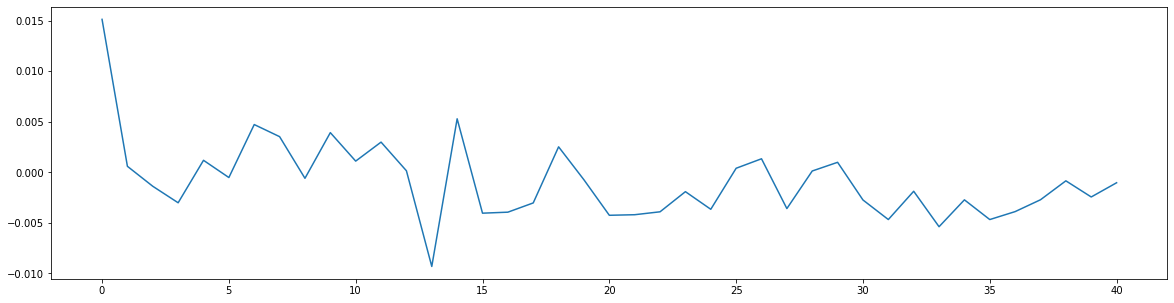

In [173]:
plt.figure(figsize=(20,5))
plt.plot(losses)

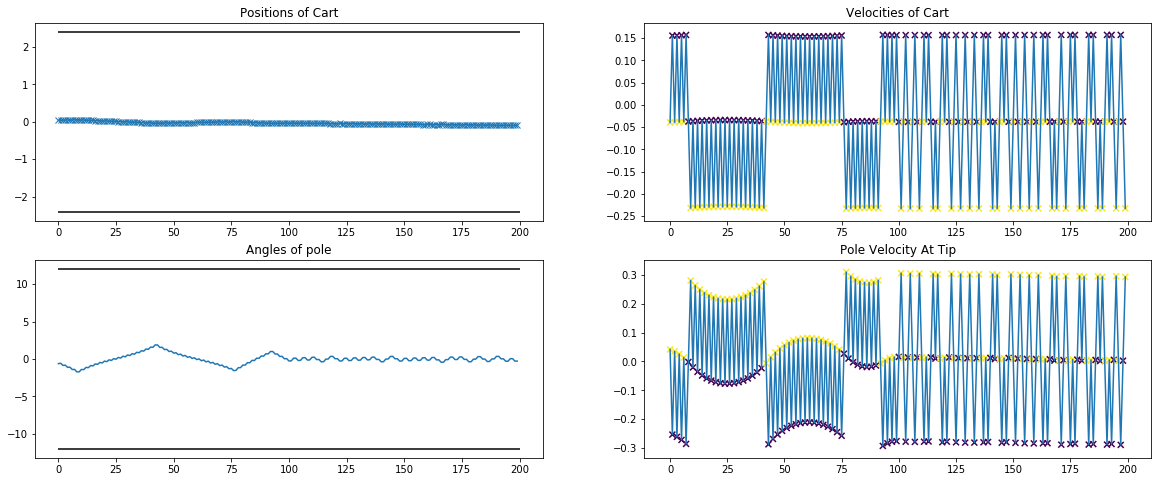

In [174]:
states, actions, rewards, reward_sum, discounted_rewards = run_episode(env, model_predict, greedy=True)
plot_episode(*states.T, actions, show_pos_thres=True)

Media de las acciones [0,1]: 0.501085
Media de rewards: 200.0


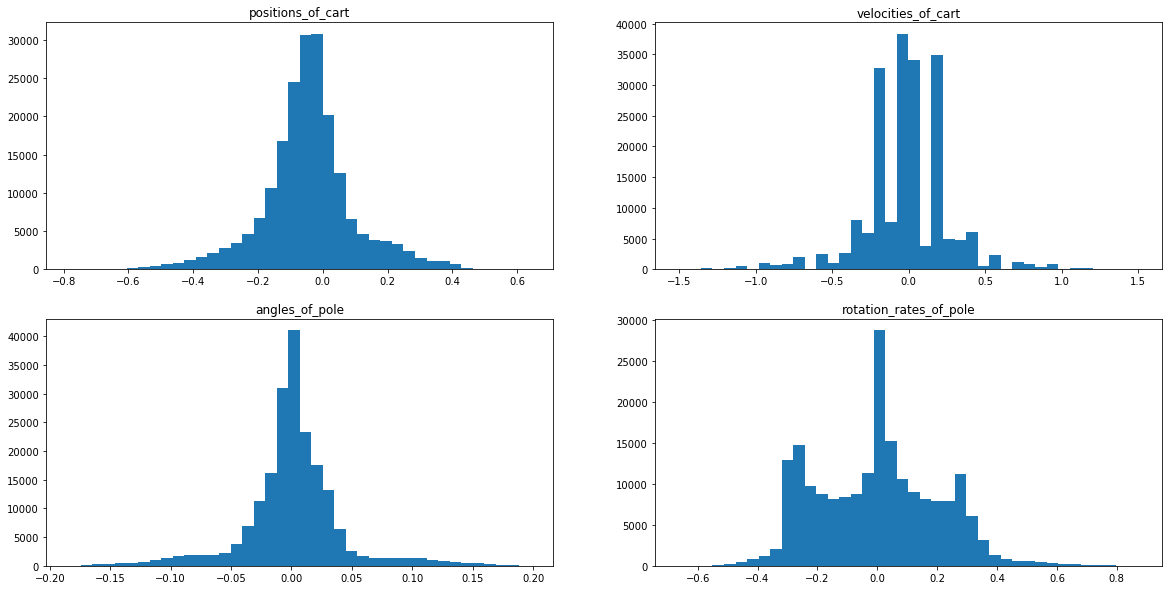

CPU times: user 1min 37s, sys: 5.61 s, total: 1min 42s
Wall time: 1min 2s


In [175]:
%time states_means, states_stds = get_observations_stats(env, lambda env: run_episode(env, model_predict, greedy=True), N=1000)

Media de las acciones [0,1]: 0.5000570233795857
Media de rewards: 26.305


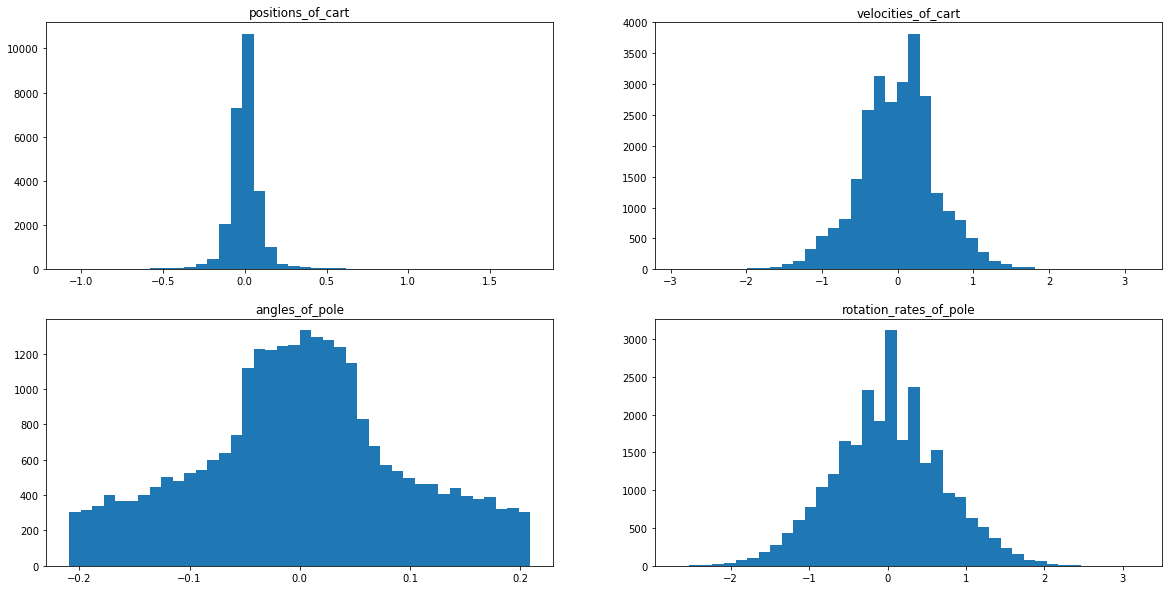

CPU times: user 15 s, sys: 627 ms, total: 15.7 s
Wall time: 10.4 s


In [176]:
%time states_means, states_stds = get_observations_stats(env, lambda env: run_episode(env, model_predict, greedy=False), N=1000)

In [177]:
# model_predict.save('model_predict-lr_0.005-training_epochs_1-hidden_layer_neurons_128-batch_size_50.hdf5')
# model_train.save('model_train-lr_0.005-training_epochs_1-hidden_layer_neurons_128-batch_size_50.hdf5')

In [296]:
print_every

100

In [347]:
training_episodes = 1
reward_sum = 0
model_train, model_predict = get_policy_model(env, hidden_layer_neurons, 0.01)
num_actions = env.action_space.n

# Placeholders for our observations, outputs and rewards
states = np.empty(0).reshape(0,dimen)
actions = np.empty(0).reshape(0,1)
rewards = np.empty(0).reshape(0,1)
discounted_rewards = np.empty(0).reshape(0,1)

# Setting up our environment
observation = env.reset()

num_episode = 0

losses = []

while num_episode < num_episodes:
    # Append the observations to our batch
    state = np.reshape(observation, [1, dimen])
    
    predict = model_predict.predict([state])[0]
    action = np.random.choice(range(num_actions),p=predict)
    
    # Append the observations and outputs for learning
    states = np.vstack([states, state])
    actions = np.vstack([actions, action])
    
    # Determine the oucome of our action
    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    rewards = np.vstack([rewards, reward])
    
    if done:
        # Determine standardized rewards
        discounted_rewards_episode = discount_rewards(rewards, gamma)       
        discounted_rewards = np.vstack([discounted_rewards, discounted_rewards_episode])
        
        rewards = np.empty(0).reshape(0,1)

        if (num_episode + 1) % batch_size == 0:
            discounted_rewards -= discounted_rewards.mean()
            discounted_rewards /= discounted_rewards.std()
            discounted_rewards = discounted_rewards.squeeze()
            actions = actions.squeeze().astype(int)
           
            actions_train = np.zeros([len(actions), num_actions])
            actions_train[np.arange(len(actions)), actions] = 1
            for i in range(training_episodes):
                loss = model_train.train_on_batch([states, discounted_rewards], actions_train)
            losses.append(loss)

            # Clear out game variables
            states = np.empty(0).reshape(0,dimen)
            actions = np.empty(0).reshape(0,1)
            discounted_rewards = np.empty(0).reshape(0,1)


        # Print periodically
        if (num_episode + 1) % print_every == 0:
            # Print status
            score = score_model(model_predict,10)
            print("Average reward for training episode {}: {:0.2f} Test Score: {:0.2f} Loss: {:0.6f}".format(
                (num_episode + 1), reward_sum/print_every, 
                score,
                np.mean(losses[-print_every:],)
            ))
            
            if score >= goal:
                print("Solved in {} episodes!".format(num_episode))
                break
            reward_sum = 0
                
        num_episode += 1
        observation = env.reset()
        

Average reward for training episode 100: 21.01 Test Score: 10.70 Loss: 0.038741
Average reward for training episode 200: 24.74 Test Score: 9.90 Loss: 0.026502
Average reward for training episode 300: 23.58 Test Score: 10.40 Loss: 0.018445
Average reward for training episode 400: 21.59 Test Score: 128.10 Loss: 0.013997
Average reward for training episode 500: 24.43 Test Score: 164.70 Loss: 0.010653
Average reward for training episode 600: 24.76 Test Score: 120.80 Loss: 0.007927
Average reward for training episode 700: 24.56 Test Score: 137.90 Loss: 0.006454
Average reward for training episode 800: 27.15 Test Score: 129.50 Loss: 0.005687
Average reward for training episode 900: 27.19 Test Score: 130.60 Loss: 0.004652
Average reward for training episode 1000: 26.31 Test Score: 111.80 Loss: 0.003936
Average reward for training episode 1100: 32.67 Test Score: 111.80 Loss: 0.003302
Average reward for training episode 1200: 28.12 Test Score: 110.20 Loss: 0.002945
Average reward for training e

KeyboardInterrupt: 

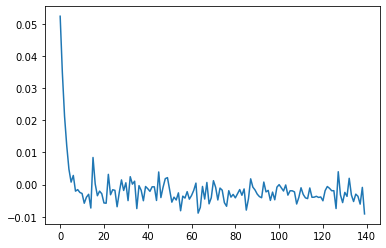

In [289]:
plt.plot(losses)

In [ ]:
env.close()